# One Month Forecasting Covid-19 Confirmed in Indonesia Using LSTM

This dataset downloaded from https://ourworldindata.org/


### Data Cleaning and Pre-Processing

In [35]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt  
import seaborn as sns 

In [36]:
#Load The Dataset
df = pd.read_csv("owid-covid-data.csv")

In [37]:
#Check the top 10 lines
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Data tersebut masih masih mencakup seluruh negara. Kita hanya akan mengambil data negara indonenesia untuk dilakukan forecasting

In [38]:
#Select Indonesia in Location Column
df = df[df['location']=='Indonesia']

In [39]:
#Check the top 10 lines
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
84074,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84075,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84076,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84077,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84078,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84079,IDN,Asia,Indonesia,2020-03-07,4.0,0.0,0.571,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84080,IDN,Asia,Indonesia,2020-03-08,6.0,2.0,0.857,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84081,IDN,Asia,Indonesia,2020-03-09,19.0,13.0,2.429,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84082,IDN,Asia,Indonesia,2020-03-10,27.0,8.0,3.571,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
84083,IDN,Asia,Indonesia,2020-03-11,34.0,7.0,4.571,1.0,1.0,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN


In [40]:
#Select Necessary Columns
df = df[['date', 'total_cases']]

In [41]:
#Convert date column as datatime types and set as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

### Exploratory Data Analysis

In [42]:
#Check the top 5 lines
df.head()

,total_cases
date,
2020-03-02,2.0
2020-03-03,2.0
2020-03-04,2.0
2020-03-05,2.0
2020-03-06,4.0


In [43]:
#Check the bottom 5 lines\
df.tail()

,total_cases
date,
2022-07-11,6112986.0
2022-07-12,6116347.0
2022-07-13,6120169.0
2022-07-14,6123753.0
2022-07-15,6127084.0


In [44]:
print("Total Day is {}, started from {} to {}".format(df.shape[0], df.index[0], df.index[-1]))

Total Day is 866, started from 2020-03-02 00:00:00 to 2022-07-15 00:00:00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2020-03-02 to 2022-07-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_cases  866 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [46]:
df.describe()

,total_cases
count,8.660000e+02
mean,2.475318e+06
std,2.212569e+06
min,2.000000e+00
25%,3.044035e+05
50%,1.711723e+06
75%,4.258923e+06
max,6.127084e+06


<AxesSubplot:xlabel='date'>

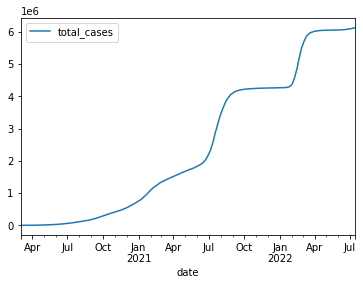

In [47]:
#Plot The Graph
df.plot()

### Pre-Modeling

#### Feature Scalling

We will use minmax scaller from scikit learn to scaling value in dataframe in range between 0 and 1

In [48]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(np.array(df).reshape(-1, 1))

In [50]:
print("First five array\n{}\n\n".format(df_scaled[:5]))
print("Last five array\n{}".format(df_scaled[-5:]))

First five array
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [3.26419656e-07]]


Last five array
[[0.99769907]
 [0.99824762]
 [0.9988714 ]
 [0.99945635]
 [1.        ]]


#### Splitting Data Into X_train and y_train

In [51]:
# Create a function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [52]:
time_step = 300 #This means that i used 300 days data as a input
X_train, y_train = create_dataset(df_scaled, time_step)

In [53]:
print("X_train shape = {}".format(X_train.shape))
print("y_train shape = {}".format(y_train.shape))

X_train shape = (565, 300)
y_train shape = (565,)


In [54]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

### Modeling

In [55]:
#Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [56]:
#Create LSTM Model
model=Sequential()
model.add(LSTM(50, input_shape=(300,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 64)                3264      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16,417
Trainable params: 16,417
Non-trai

In [58]:
history = model.fit(X_train, y_train, epochs=7, batch_size=8, verbose=1)

Epoch 1/7
71/71 [==============================] - 8s 76ms/step - loss: 0.0430
Epoch 2/7
71/71 [==============================] - 5s 75ms/step - loss: 2.8924e-04
Epoch 3/7
71/71 [==============================] - 6s 79ms/step - loss: 2.1467e-04
Epoch 4/7
71/71 [==============================] - 6s 78ms/step - loss: 2.1346e-04
Epoch 5/7
71/71 [==============================] - 5s 75ms/step - loss: 1.7442e-04
Epoch 6/7
71/71 [==============================] - 5s 77ms/step - loss: 1.8508e-04
Epoch 7/7
71/71 [==============================] - 5s 73ms/step - loss: 1.6080e-04


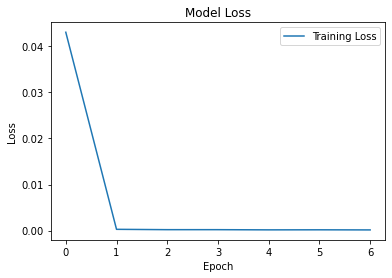

In [59]:
# Plot loss model for each epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

In [60]:
#Lets do the prediction for calculate Mean Squared Error between prediction and actual data
train_predict=model.predict(X_train)

18/18 [==============================] - 1s 35ms/step


In [61]:
#Transform back from scaled value to original value
train_predict=scaler.inverse_transform(train_predict)
y_train=scaler.inverse_transform(np.array(y_train).reshape(-1, 1))

In [62]:
# Calculate Mean Squared Error
import math
from sklearn.metrics import mean_squared_error
print("MSE = ", math.sqrt(mean_squared_error(y_train,train_predict)))

MSE =  63078.7371719365


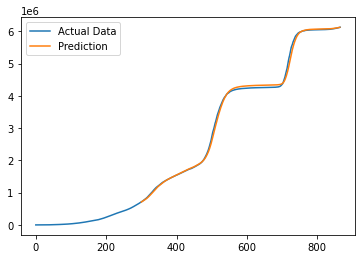

In [63]:
#Plotting predictions and actual data
look_back=300 #Number of input

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# plot actual data and predictions
plt.plot(scaler.inverse_transform(df_scaled))
plt.plot(trainPredictPlot)
plt.legend(['Actual Data', 'Prediction'], loc='upper left')
plt.show()

### Forecasting for next 14 Days from 2022-07-16

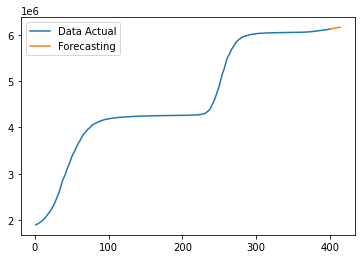

In [64]:
num_input = int(len(df_scaled)-300)
data_input = df_scaled[num_input:].reshape(-1, 1)
list_input = []

for i in range(len(data_input)):
    list_input.append(data_input[i][0])

output = []
num_features = 300
i=0

while(i<14):
    if(len(list_input)>num_features):
        x_input = np.array(list_input[1:])
        x_input = x_input.reshape(-1, 1)
        x_input = x_input.reshape((1, num_features, 1))
        prediction = model.predict(x_input, verbose=0)
        list_input.extend(prediction[0].tolist())
        list_input = list_input[1:]
        output.extend(prediction.tolist())
        i=i+1
    else:
        x_input = data_input.reshape((1, num_features, 1))
        prediction = model.predict(x_input, verbose=0)
        list_input.extend(prediction[0].tolist())
        output.extend(prediction.tolist())
        i=i+1
        
day_new=np.arange(1,401)
day_pred=np.arange(401,415)
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df_scaled[466:]))
plt.plot(day_pred,scaler.inverse_transform(output))
plt.legend(['Data Actual', 'Forecasting'], loc='upper left')
plt.show()

In [65]:
forecasting = scaler.inverse_transform(output)

In [66]:
for i in range(len(forecasting)):
    print("Forecasting for next {} days = {} Total Cases".format(i+1, int(forecasting[i][0])))

Forecasting for next 1 days = 6130150 Total Cases
Forecasting for next 2 days = 6132937 Total Cases
Forecasting for next 3 days = 6135731 Total Cases
Forecasting for next 4 days = 6138521 Total Cases
Forecasting for next 5 days = 6141302 Total Cases
Forecasting for next 6 days = 6144068 Total Cases
Forecasting for next 7 days = 6146815 Total Cases
Forecasting for next 8 days = 6149541 Total Cases
Forecasting for next 9 days = 6152244 Total Cases
Forecasting for next 10 days = 6154922 Total Cases
Forecasting for next 11 days = 6157574 Total Cases
Forecasting for next 12 days = 6160199 Total Cases
Forecasting for next 13 days = 6162795 Total Cases
Forecasting for next 14 days = 6165363 Total Cases
